# Lead Conversion Model

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
leads = pd.read_csv('Leads.csv')

# Display all columns of the dataset
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Explore the Dataset

In [4]:
# Dimension of the dataset
leads.shape

(9240, 37)

In [5]:
# Checking the statistical aspects and outliers in the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check for datatype of the columns and non-null values present 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Check for null values and fill them accordingly

In [7]:
# Count of null values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Percentage of null values in each column
(leads.isnull().sum()/ len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Replace 'Select' value in each column with null as mentioned in the problem statement
leads.replace("Select", np.nan, inplace = True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Check again percentage of null values in each column in Descending order (after replacing 'Select' to null values)
nul_per = (leads.isnull().sum()/ len(leads))*100
nul_per.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
#### Check each column 

In [12]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [13]:
leads['Lead Profile'].value_counts()

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [14]:
leads['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [15]:
# Drop columns having null values greater than 50% as they are unreliable feature and can have subjectivity (lead quality) 
leads.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality'], axis=1, inplace=True)

In [16]:
leads['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

In [17]:
# Find mean and median 
print(leads['Asymmetrique Profile Score'].mean())
print(leads['Asymmetrique Profile Score'].median())

16.344882516925527
16.0


In [18]:
leads['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [19]:
leads['Asymmetrique Activity Index'].value_counts() 

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [20]:
leads['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

In [21]:
# Having null values around 45%, even if we fill null values with mean, median or mode, it will create high value imbalance, hence of no use and should be dropped
leads.drop(['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1, inplace=True)

In [22]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [23]:
leads['City'].value_counts()  # data lacks diversity and highly concentrated around Maharashtra region and hence is not useful for model building

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [24]:
(leads['What is your current occupation'].value_counts()/len(leads))*100  # high data imbalance as mostly are unemployed and higher null values, hence can be dropped

What is your current occupation
Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: count, dtype: float64

In [25]:
leads['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [26]:
# Since the data in 'Specialization' column is distributed among different categories, we can create 'Other categories' for null values
leads['Specialization'] = leads['Specialization'].fillna('Other Categories')
leads['Specialization'].value_counts()

Specialization
Other Categories                     3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [27]:
leads['Tags'].value_counts()  # higher null values and less significant feature, hence can be dropped

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [28]:
# New category can be created as 'Not Tagged' for null values
leads['Tags'] = leads['Tags'].fillna('Not Tagged')
leads['Tags'].value_counts()

Tags
Not Tagged                                           3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [29]:
leads['What matters most to you in choosing a course'].value_counts()  # high data imbalance (mostly chose for Better career prospects)

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [30]:
leads['Country'].value_counts()/len(leads)  # high data imbalance

Country
India                   0.702597
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vi

In [31]:
leads['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [32]:
print(leads['Page Views Per Visit'].mean())
print(leads['Page Views Per Visit'].median())
print(leads['Page Views Per Visit'].max())     

2.3628199494672084
2.0
55.0


In [33]:
# Since having outliers so we can fill null values with the median i.e, 2.0
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(2.0)
leads['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [34]:
leads['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [35]:
print(leads['TotalVisits'].mean())
print(leads['TotalVisits'].median())
print(leads['TotalVisits'].max())

3.445237833681204
3.0
251.0


In [36]:
# Similarly, having outliers so we can fill null values with the median i.e, 3.0
leads['TotalVisits'] = leads['TotalVisits'].fillna(3.0)
leads['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [37]:
leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [38]:
leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [39]:
# Since both the columns ('Last Notable Activity' and 'Last Activity') have similar values, we can drop th column 'Last Activity' (having null values)
leads.drop(['Last Activity'], axis=1, inplace=True)

In [40]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
leads['Lead Source'].value_counts()  # High data imbalance

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [42]:
leads['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [43]:
leads['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [44]:
leads['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [45]:
leads['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [46]:
leads['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [47]:
leads['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [48]:
leads['Prospect ID'].value_counts()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64

In [49]:
leads['Lead Number'].value_counts()  # Since we have 'Lead Number', we can drop 'Prospect ID', as it will create duplication of IDs which of no use

Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

In [50]:
leads['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [51]:
leads['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [52]:
leads['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [53]:
leads['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [54]:
leads['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [55]:
leads['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [56]:
leads['Search'].value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

In [57]:
leads['Total Time Spent on Website'].value_counts()

Total Time Spent on Website
0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: count, Length: 1731, dtype: int64

In [58]:
leads['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [59]:
leads['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [60]:
leads['Do Not Email'].value_counts()/len(leads)

Do Not Email
No     0.920563
Yes    0.079437
Name: count, dtype: float64

In [61]:
leads['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

### Data Preparation

In [62]:
# Drop features having high imbalance of data
leads.drop(['What matters most to you in choosing a course','What is your current occupation','City','Country','Lead Source','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Prospect ID','Newspaper Article','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Magazine','Search','Do Not Call','Do Not Email'], axis=1, inplace=True)

In [63]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [64]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Specialization                          9240 non-null   object 
 7   Tags                                    9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


In [65]:
# Find categorical columns and its number of unique values or categories
Categorical_col = leads.select_dtypes(include= 'object')
Categorical_col.nunique()

Lead Origin                                5
Specialization                            19
Tags                                      27
A free copy of Mastering The Interview     2
Last Notable Activity                     16
dtype: int64

#### Coverting Yes/No column to 1/0 column

In [66]:
# Applying map function to the binary column 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].str.strip().str.capitalize()
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [67]:
leads['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
0    6352
1    2888
Name: count, dtype: int64

In [68]:
leads.head()

,Lead Number,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,0,0.0,0,0.0,Other Categories,Interested in other courses,0,Modified
1,660728,API,0,5.0,674,2.5,Other Categories,Ringing,0,Email Opened
2,660727,Landing Page Submission,1,2.0,1532,2.0,Business Administration,Will revert after reading the email,1,Email Opened
3,660719,Landing Page Submission,0,1.0,305,1.0,Media and Advertising,Ringing,0,Modified
4,660681,Landing Page Submission,1,2.0,1428,1.0,Other Categories,Will revert after reading the email,0,Modified


#### Creating Dummy Variables for categorical columns 

In [69]:
# Again see categorical columns and its number of unique values or categories
Categorical_col = leads.select_dtypes(include= 'object')
Categorical_col.nunique()

Lead Origin               5
Specialization           19
Tags                     27
Last Notable Activity    16
dtype: int64

In [70]:
# Create a list of categorical columns
categ_list = Categorical_col.columns.to_list()
categ_list

['Lead Origin', 'Specialization', 'Tags', 'Last Notable Activity']

In [71]:
# Creating dummy variables for categorical columns
dummy1 = pd.get_dummies(leads['Lead Origin'], dtype= int, prefix= 'Lead Origin', drop_first=True)
dummy2 = pd.get_dummies(leads['Specialization'], dtype= int, prefix= 'Specialization', drop_first=True)
dummy3 = pd.get_dummies(leads['Tags'], dtype= int, prefix= 'Tags', drop_first=True)
dummy4 = pd.get_dummies(leads['Last Notable Activity'], dtype= int, prefix= 'Last Notable Activity', drop_first=True)

In [72]:
# Add all dummy variables to the original leads dataframe
leads = pd.concat([leads,dummy1,dummy2,dummy3,dummy4], axis=1)

In [73]:
leads = leads.drop(['Lead Origin', 'Specialization', 'Tags', 'Last Notable Activity'], axis=1)

In [74]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Categories,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
leads.shape

(9240, 69)

### Checking for Outliers in Continuous Numerical Columns

In [76]:
# Checking for outliers in the continuous variables
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [77]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


##### We can see there are outliers, which we will visualize for better understanding

### Looking for Outliers in 'TotalVisits' column

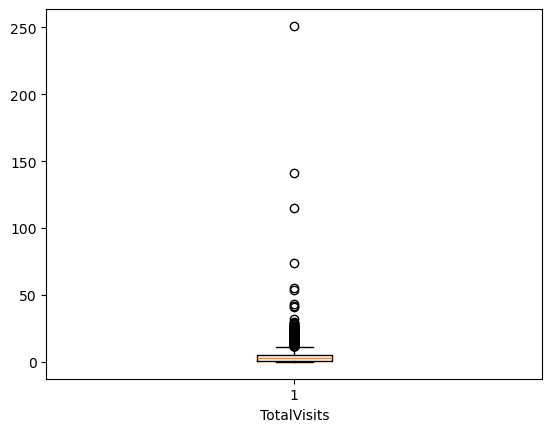

In [78]:
plt.boxplot(leads['TotalVisits'])
plt.xlabel('TotalVisits')
plt.show()

In [79]:
# Finding 99 percentile of 'TotalVisits' column
quant = leads['TotalVisits'].quantile(0.99)
quant

17.0

In [80]:
# Replacing values greater than 99 percentile with value of 99 percentile i.e, 17.0
leads.loc[leads['TotalVisits']>quant, 'TotalVisits'] = quant

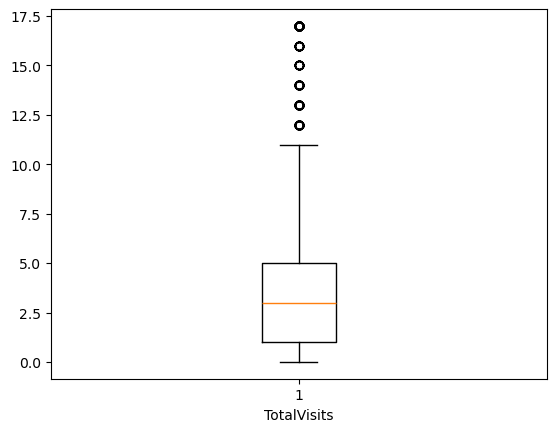

In [81]:
# Again make boxplot with changed value of outliers
plt.boxplot(leads['TotalVisits'])
plt.xlabel('TotalVisits')
plt.show()

### Looking for Outliers in 'Total Time Spent on Website' column

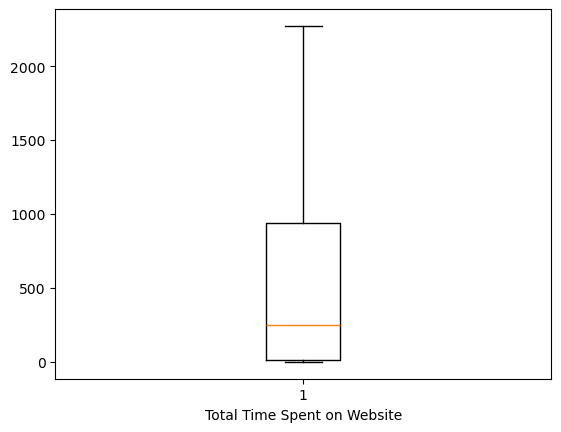

In [82]:
plt.boxplot(leads['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [83]:
# No outliers hence can be kept as it is.

### Looking for Outliers in 'Page Views Per Visit' column

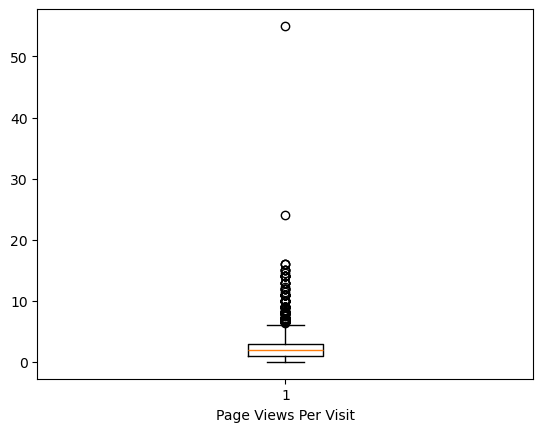

In [84]:
plt.boxplot(leads['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')
plt.show()

In [85]:
# Finding 99 percentile of 'TotalVisits' column
quant2 = leads['Page Views Per Visit'].quantile(0.99)
quant2

9.0

In [86]:
# Replacing values greater than 99 percentile with value of 99 percentile i.e, 9.0
leads.loc[leads['Page Views Per Visit']>quant2, 'Page Views Per Visit'] = quant2

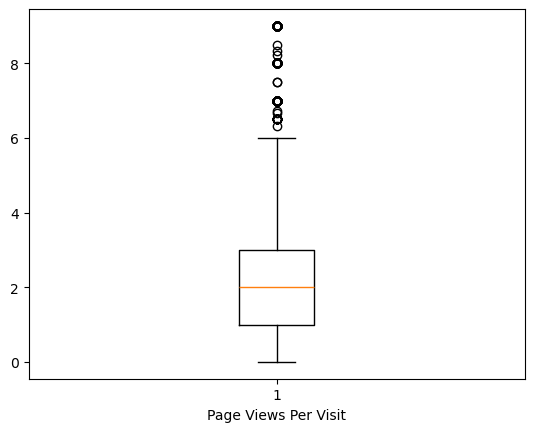

In [87]:
plt.boxplot(leads['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')
plt.show()

## Looking for Correlation

In [88]:
corr_matrix = leads.corr()

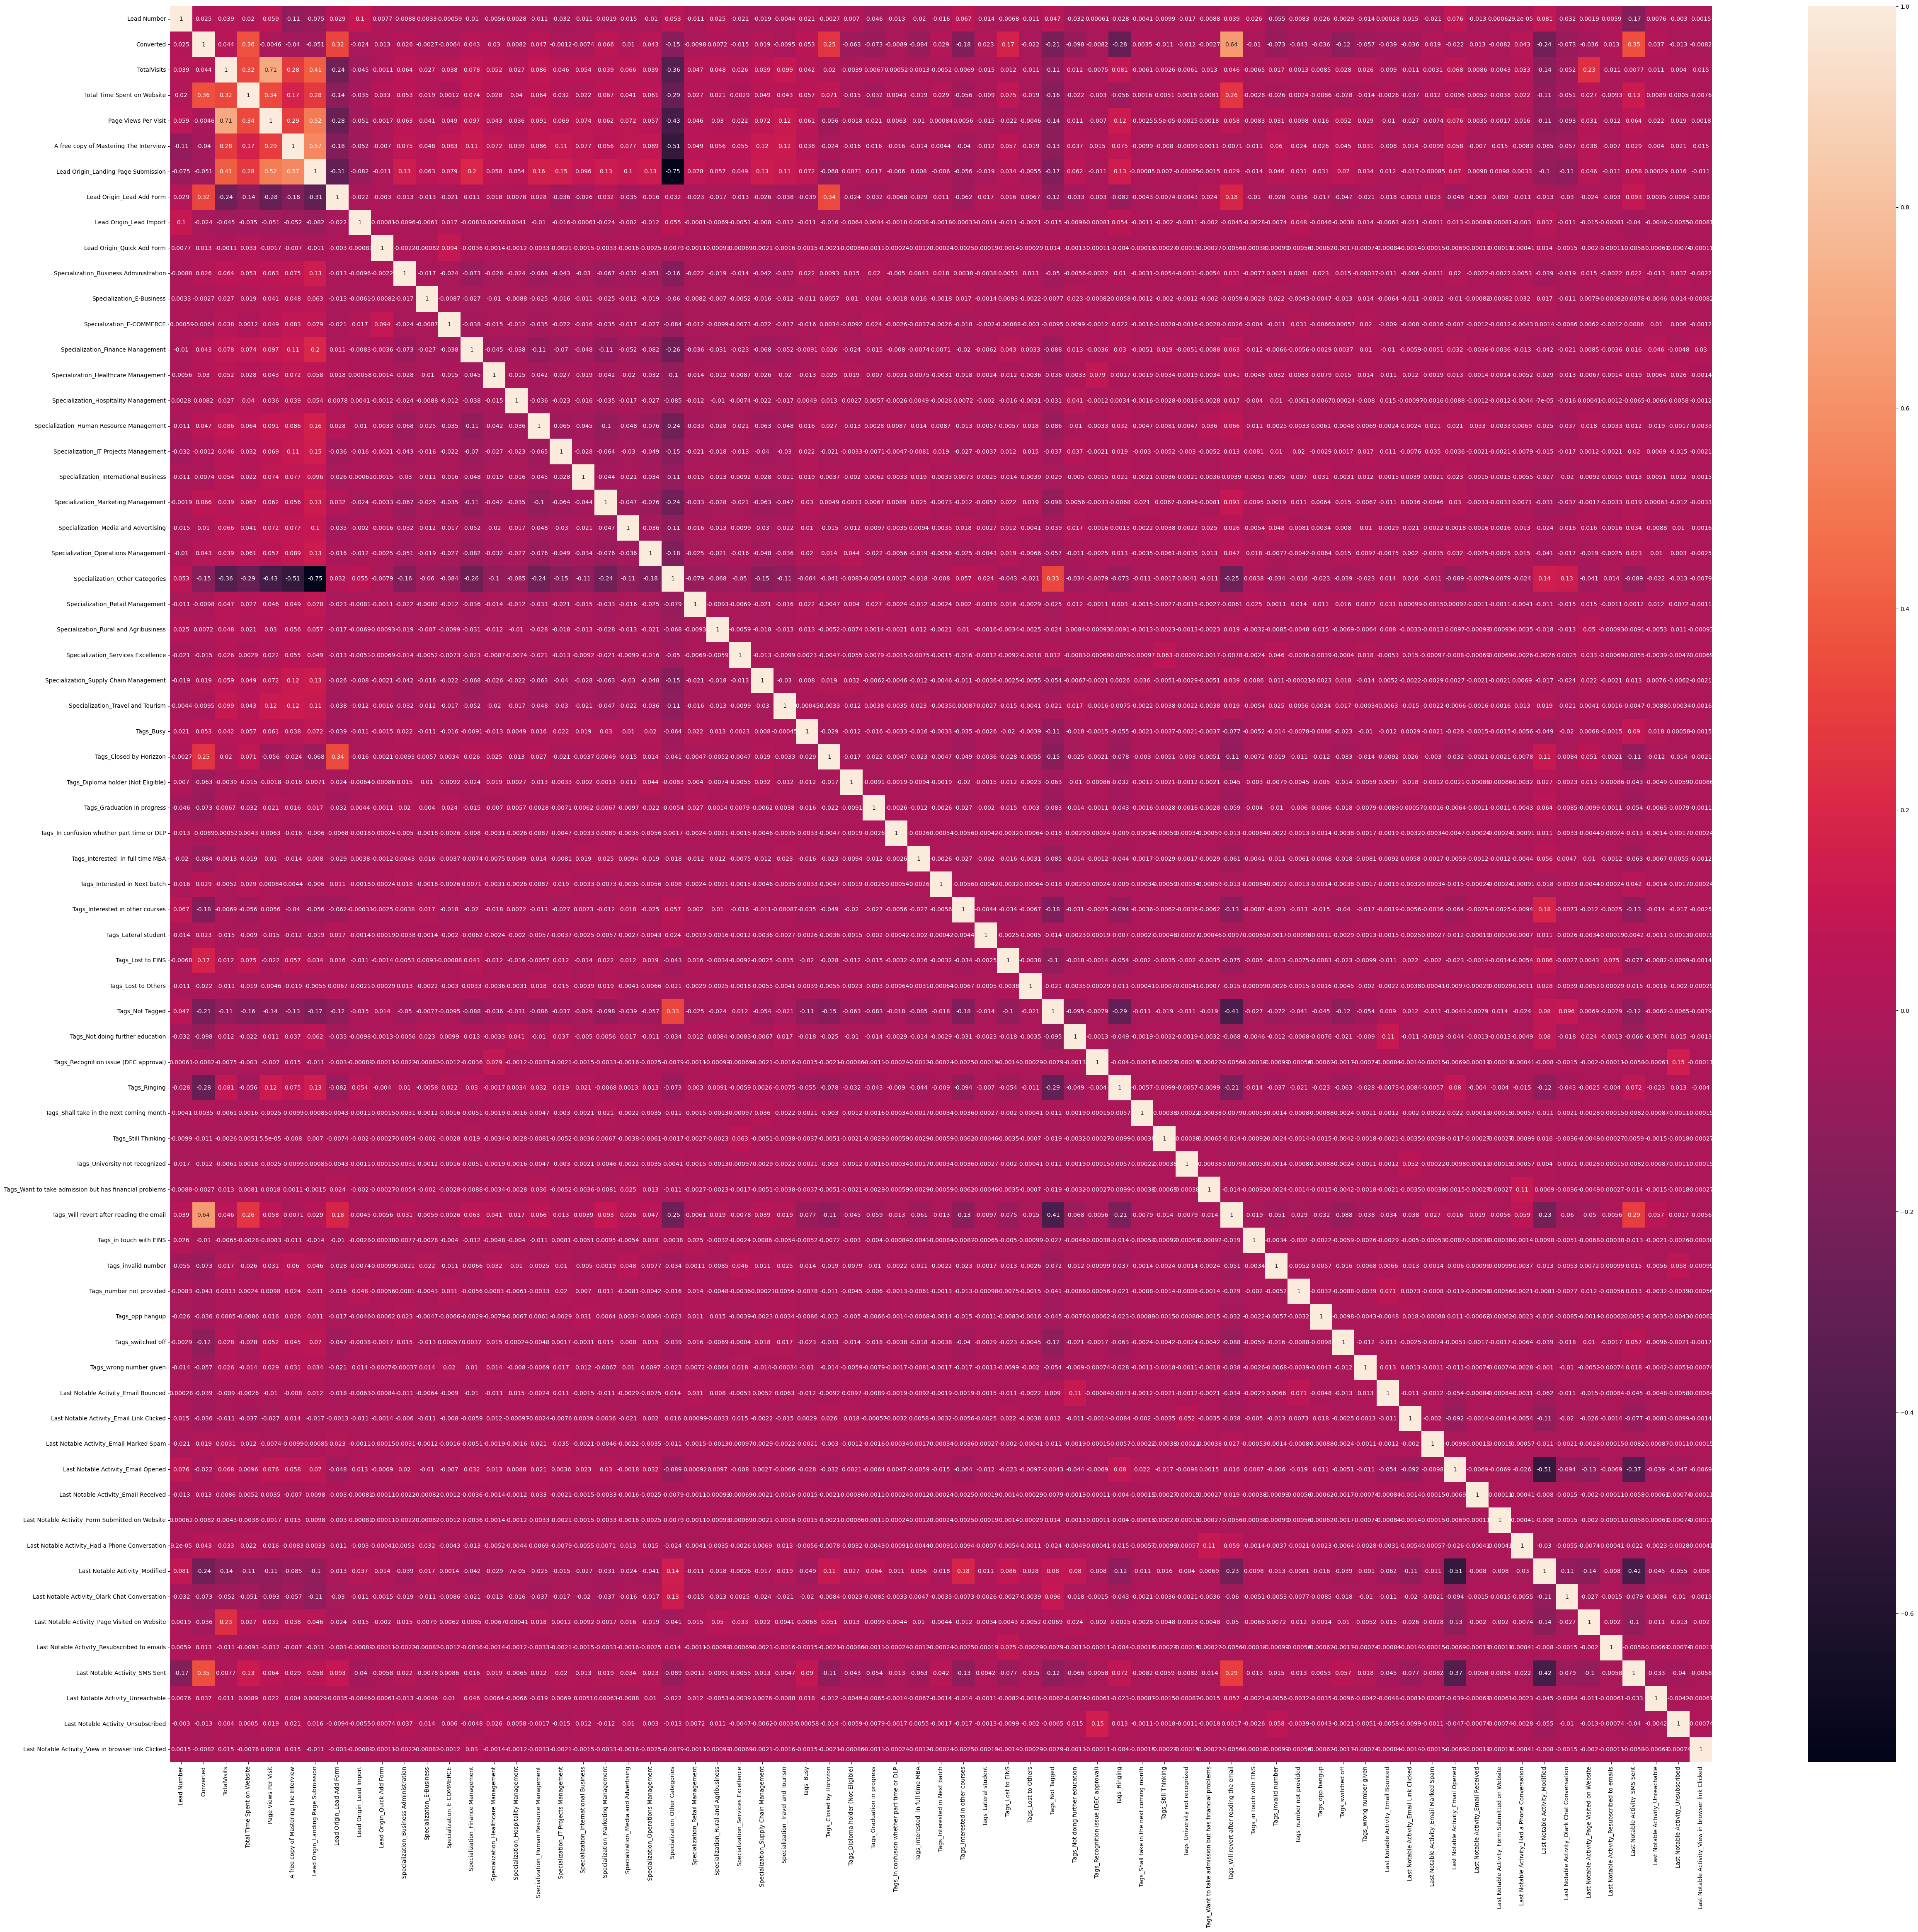

In [89]:
plt.figure(figsize = (60,55))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [90]:
# Extract high correlation values

# Unstack the matrix to get pairs
corr_pairs = corr_matrix.unstack()

# Filter only those with correlation > 0.5 and < 1 i.e, positive correlations
strong_corr = corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 1)]

# Drop duplicate pairs (since correlation is symmetric)
strong_corr = strong_corr.drop_duplicates()

print(strong_corr.sort_values(ascending=False))

TotalVisits                             Page Views Per Visit                        0.706203
Converted                               Tags_Will revert after reading the email    0.644307
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission         0.569633
Page Views Per Visit                    Lead Origin_Landing Page Submission         0.520359
dtype: float64


In [91]:
### Since 'TotalVisits' have strong correlation with both 'Page Views Per Visit' and 'Lead Origin_Landing Page Submission'; we can remove it

In [92]:
leads['Lead Origin_Landing Page Submission'].value_counts()

Lead Origin_Landing Page Submission
1    4886
0    4354
Name: count, dtype: int64

In [93]:
leads['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
0    6352
1    2888
Name: count, dtype: int64

In [94]:
leads[['A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Converted']].corr()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Converted
A free copy of Mastering The Interview,1.000000,0.569633,-0.039820
Lead Origin_Landing Page Submission,0.569633,1.000000,-0.051236
Converted,-0.039820,-0.051236,1.000000


In [95]:
### Since we have better correlation between Converted and Lead Origin_Landing Page Submission, that will also help to analyze which landing pages convert best and allocate resources to high-ROI channels; we can drop 'A free copy of Mastering The Interview'

In [96]:
# Extract high correlation values

# Unstack the matrix to get pairs
corr_pairs = corr_matrix.unstack()

# Filter only those with correlation > -1 and < -0.5 i.e, negative correlations 
strong_corr = corr_pairs[(corr_pairs > -1) & (corr_pairs < -0.5)]

# Drop duplicate pairs (since correlation is symmetric)
strong_corr = strong_corr.drop_duplicates()

print(strong_corr.sort_values(ascending=False))

Last Notable Activity_Email Opened      Last Notable Activity_Modified    -0.507426
A free copy of Mastering The Interview  Specialization_Other Categories   -0.509189
Lead Origin_Landing Page Submission     Specialization_Other Categories   -0.748263
dtype: float64


In [97]:
leads[['Last Notable Activity_Email Opened', 'Last Notable Activity_Modified', 'Converted']].corr()

,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Converted
Last Notable Activity_Email Opened,1.000000,-0.507426,-0.021955
Last Notable Activity_Modified,-0.507426,1.000000,-0.244294
Converted,-0.021955,-0.244294,1.000000


In [98]:
## Since 'Last Notable Activity_Modified' has better correlation with 'Converted'; we can drop 'Last Notable Activity_Email Opened'

In [99]:
leads = leads.drop(['TotalVisits', 'A free copy of Mastering The Interview', 'Last Notable Activity_Email Opened'], axis=1)
leads.head()

,Lead Number,Converted,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Categories,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Train-Test split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
# Creating feature variable X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Categories,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
# Creating target variable y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [103]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

## Feature Scaling

In [104]:
from sklearn.preprocessing import RobustScaler

In [105]:
scaler = RobustScaler()

X_train[['Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Categories,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Tagged,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
295,0.050852,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1657,-0.036787,-0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4592,1.753854,-0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3558,-0.270490,-1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
629,0.083311,1.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
#Checking the Conversion Rate
Conversion = (sum(leads['Converted']) / len(leads['Converted'].index)) * 100
Conversion

38.53896103896104

##  Model Building

In [107]:
import statsmodels.api as sm

In [108]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7327
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.1
Date:                Sun, 13 Apr 2025   Deviance:                       2902.3
Time:                        23:17:33   Pearson chi2:                 1.19e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6091
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.5750      0.791     -5.784      0.000      -6.125      -3.025
Total Time Spent on Website                                1.6665      0.091     18.337      0.000       1.488       1.845
Page Views Per Visit                                      -0.1826      0.063     -2.912      0.004      -0.306      -0.060
Lead Origin_Landing Page Submission                       -0.9157      0.192     -4.758      0.000      -1.293      -0.539
Lead Origin_Lead Add Form                                  2.2088      0.251      8.804      0.000       1.717       2.701
Lead Origin_Lead Import                                   -0.6168      0.753     -0.819      0.413      -2.094       0.860
Lead Origin_Quick Add Form                                22.7704   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Specialization_Business Administration                     0.0132      0.365      0.036      0.971      -0.703       0.729
Specialization_E-Business                                 -0.4616      0.618     -0.747      0.455      -1.672       0.749
Specialization_E-COMMERCE                                  0.4371      0.525      0.832      0.405      -0.593       1.467
Specialization_Finance Management                         -0.3385      0.324     -1.045      0.296      -0.973       0.296
Specialization_Healthcare Management                      -0.1579      0.486     -0.325      0.745      -1.110       0.794
Specialization_Hospitality Management                     -0.5624      0.561     -1.003      0.316      -1.661       0.536
Specialization_Human Resource Management                  -0.1224      0.327     -0.375      0.708      -0.763       0.518
Specialization_IT Projects Management                     -0.1312      0.396     -0.331      0.741      -0.908       0.646
Specialization_International Business                     -0.1266      0.474     -0.267      0.790      -1.056       0.803
Specialization_Marketing Management                        0.0262      0.329      0.080      0.937      -0.618       0.670
Specialization_Media and Advertising                      -0.3058      0.450     -0.679      0.497      -1.188       0.576
Specialization_Operations Management                      -0.0927      0.360     -0.258      0.797      -0.798       0.612
Specialization_Other Categories                           -0.3780      0.333     -1.137      0.256      -1.030       0.274
Specialization_Retail Management                          -0.4845      0.568     -0.854      0.393      -1.597       0.628
Specialization_Rural and Agribusiness                     -0.2416      0.693     -0.349      0.727      -1.599       1.116
Speciali

## Feature selection using RFE

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [111]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False])

In [112]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Origin_Quick Add Form', False, 33),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 43),
 ('Specialization_Hospitality Management', False, 20),
 ('Specialization_Human Resource Management', False, 49),
 ('Specialization_IT Projects Management', False, 46),
 ('Specialization_International Business', False, 39),
 ('Specialization_Marketing Management', False, 31),
 ('Specialization_Media and Advertising', False, 25),
 ('Specialization_Operations Management', False, 48),
 ('Specialization_Other Categories', False, 23),
 ('Specialization_Retail Management', False, 17),
 ('Speciali

In [113]:
#Accepted Features
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not Tagged', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [114]:
#Rejected Features
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Other Categories', 'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in prog

In [115]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1522.4
Date:                Sun, 13 Apr 2025   Deviance:                       3044.7
Time:                        23:17:35   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6015
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7915      0.196    -19.379      0.000      -4.175      -3.408
Total Time Spent on Website                  1.4325      0.081     17.601      0.000       1.273       1.592
Lead Origin_Lead Add Form                    2.7216      0.242     11.230      0.000       2.247       3.197
Tags_Busy                                    2.5202      0.283      8.901      0.000       1.965       3.075
Tags_Closed by Horizzon                      8.1979      0.743     11.029      0.000       6.741       9.655
Tags_Lateral student                        28.6349   6.34e+04      0.000      1.000   -1.24e+05    1.24e+05
Tags_Lost to EINS                            7.3502      0.551     13.330      0.000       6.269       8.431
Tags_Not Tagged                              2.0382      0.194     10.507      0.000       1.658       2.418
Tags_Ringing                                -1.6935      0.286     -5.929      0.000      -2.253      -1.134
Tags_Will revert after reading the email     6.1378      0.235     26.123      0.000       5.677       6.598
Tags_invalid number                         -2.1641      1.114     -1.943      0.052      -4.347       0.018
Tags_number not provided                   -22.7762   2.34e+04     -0.001      0.999   -4.58e+04    4.58e+04
Tags_switched off                           -1.9577      0.554     -3.534      0.000      -3.043      -0.872
Tags_wrong number given                    -22.3413   1.83e+04     -0.001      0.999    -3.6e+04    3.59e+04
Last Notable Activity_Modified              -1.0250      0.116     -8.854      0.000      -1.252      -0.798
Last Notable Activity_SMS Sent               2.3629      0.127     18.571      0.000       2.114       2.612
============================================================================================================
"""

In [116]:
## Let's take a look into "Tags_number not provided" and Tags_wrong number given" since they have a significant value 0.999

In [117]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

295     0.157043
1657    0.055675
4592    0.999270
3558    0.105202
629     0.163297
125     0.043790
3539    0.006595
719     0.018167
4015    0.121535
2175    0.126930
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15704278, 0.05567463, 0.99926987, 0.10520222, 0.16329661,
       0.04378978, 0.00659487, 0.01816657, 0.12153481, 0.12693008])

In [119]:
# Creating the dataframe with the actual Converted flag
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final

,Converted,Conversion_Prob,Lead Number
0,0,1.570428e-01,295
1,0,5.567463e-02,1657
2,1,9.992699e-01,4592
3,0,1.052022e-01,3558
4,0,1.632966e-01,629
...,...,...,...
7387,1,9.288366e-01,7891
7388,0,1.221934e-12,9225
7389,0,1.508396e-02,4859
7390,0,4.047627e-02,3264


In [120]:
# Creating new column 'predicted' with 1 if Conversion_Prob. > .5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final

,Converted,Conversion_Prob,Lead Number,predicted
0,0,1.570428e-01,295,0
1,0,5.567463e-02,1657,0
2,1,9.992699e-01,4592,1
3,0,1.052022e-01,3558,0
4,0,1.632966e-01,629,0
...,...,...,...,...
7387,1,9.288366e-01,7891,1
7388,0,1.221934e-12,9225,0
7389,0,1.508396e-02,4859,0
7390,0,4.047627e-02,3264,0


In [121]:
from sklearn import metrics

In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4343  211]
 [ 331 2507]]


In [123]:
# Actual/Predicted     not_conversion    conversion
# not_conversion        4343              211
# conversion            331               2507

In [124]:
#checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9266774891774892


In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.76
14,Last Notable Activity_SMS Sent,1.70
13,Last Notable Activity_Modified,1.53
6,Tags_Not Tagged,1.45
0,Total Time Spent on Website,1.41
1,Lead Origin_Lead Add Form,1.41
3,Tags_Closed by Horizzon,1.32
7,Tags_Ringing,1.15
5,Tags_Lost to EINS,1.07
2,Tags_Busy,1.06


In [127]:
## The p-value for variable 'Tags_number not provided' is quite high. removing that feature and re-run the model.

In [128]:
col = col.drop('Tags_number not provided')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not Tagged', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [129]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1525.9
Date:                Sun, 13 Apr 2025   Deviance:                       3051.7
Time:                        23:17:36   Pearson chi2:                 1.12e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6011
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8754      0.197    -19.673      0.000      -4.261      -3.489
Total Time Spent on Website                  1.4274      0.081     17.570      0.000       1.268       1.587
Lead Origin_Lead Add Form                    2.7226      0.242     11.235      0.000       2.248       3.198
Tags_Busy                                    2.6161      0.283      9.252      0.000       2.062       3.170
Tags_Closed by Horizzon                      8.2812      0.744     11.136      0.000       6.824       9.739
Tags_Lateral student                        28.7184   6.35e+04      0.000      1.000   -1.24e+05    1.24e+05
Tags_Lost to EINS                            7.4341      0.552     13.470      0.000       6.352       8.516
Tags_Not Tagged                              2.1286      0.195     10.933      0.000       1.747       2.510
Tags_Ringing                                -1.5873      0.284     -5.580      0.000      -2.145      -1.030
Tags_Will revert after reading the email     6.2238      0.236     26.382      0.000       5.761       6.686
Tags_invalid number                         -2.0566      1.112     -1.850      0.064      -4.236       0.123
Tags_switched off                           -1.8511      0.553     -3.346      0.001      -2.935      -0.767
Tags_wrong number given                    -22.2360   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Last Notable Activity_Modified              -1.0238      0.116     -8.838      0.000      -1.251      -0.797
Last Notable Activity_SMS Sent               2.3390      0.126     18.526      0.000       2.092       2.586
============================================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [131]:
y_train_pred[:10]

array([0.15786086, 0.05608704, 0.99924722, 0.10593801, 0.16411839,
       0.04415592, 0.00607876, 0.01674025, 0.1223075 , 0.12771257])

In [132]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [133]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.157861,295,0
1,0,0.056087,1657,0
2,1,0.999247,4592,1
3,0,0.105938,3558,0
4,0,0.164118,629,0


In [134]:
#again check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9261363636363636


In [135]:
#check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.76
13,Last Notable Activity_SMS Sent,1.70
12,Last Notable Activity_Modified,1.53
6,Tags_Not Tagged,1.45
0,Total Time Spent on Website,1.41
1,Lead Origin_Lead Add Form,1.41
3,Tags_Closed by Horizzon,1.32
7,Tags_Ringing,1.15
5,Tags_Lost to EINS,1.07
2,Tags_Busy,1.06


In [136]:
## The VIF for variable 'Tags_Lateral student' is quite high. removing that feature and re-run the model.

In [137]:
col = col.drop('Tags_Lateral student')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Tagged',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [138]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1535.7
Date:                Sun, 13 Apr 2025   Deviance:                       3071.4
Time:                        23:17:36   Pearson chi2:                 1.14e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6000
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8010      0.191    -19.872      0.000      -4.176      -3.426
Total Time Spent on Website                  1.4192      0.081     17.536      0.000       1.261       1.578
Lead Origin_Lead Add Form                    2.7306      0.241     11.327      0.000       2.258       3.203
Tags_Busy                                    2.5407      0.279      9.112      0.000       1.994       3.087
Tags_Closed by Horizzon                      8.1927      0.742     11.043      0.000       6.739       9.647
Tags_Lost to EINS                            7.3472      0.550     13.368      0.000       6.270       8.424
Tags_Not Tagged                              2.0510      0.189     10.855      0.000       1.681       2.421
Tags_Ringing                                -1.6609      0.281     -5.919      0.000      -2.211      -1.111
Tags_Will revert after reading the email     6.1430      0.231     26.594      0.000       5.690       6.596
Tags_invalid number                         -2.1273      1.110     -1.917      0.055      -4.302       0.048
Tags_switched off                           -1.9243      0.551     -3.491      0.000      -3.005      -0.844
Tags_wrong number given                    -22.3084   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Last Notable Activity_Modified              -1.0062      0.115     -8.730      0.000      -1.232      -0.780
Last Notable Activity_SMS Sent               2.3412      0.126     18.587      0.000       2.094       2.588
============================================================================================================
"""

In [139]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [140]:
y_train_pred[:10]

array([0.1573846 , 0.05687402, 0.99923294, 0.10584965, 0.16359024,
       0.04484577, 0.00666819, 0.0180296 , 0.12210675, 0.12747243])

In [141]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [142]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.157385,295,0
1,0,0.056874,1657,0
2,1,0.999233,4592,1
3,0,0.105850,3558,0
4,0,0.163590,629,0


In [143]:
# again check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9261363636363636


In [144]:
#check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,1.76
12,Last Notable Activity_SMS Sent,1.70
11,Last Notable Activity_Modified,1.53
5,Tags_Not Tagged,1.45
0,Total Time Spent on Website,1.41
1,Lead Origin_Lead Add Form,1.41
3,Tags_Closed by Horizzon,1.32
6,Tags_Ringing,1.15
4,Tags_Lost to EINS,1.07
2,Tags_Busy,1.06


In [145]:
## The VIF for variable 'Tags_invalid number' is quite high. removing that feature and re-run the model.

In [146]:
col = col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Tagged',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [147]:
#re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1538.8
Date:                Sun, 13 Apr 2025   Deviance:                       3077.7
Time:                        23:17:36   Pearson chi2:                 1.14e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5997
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9219      0.190    -20.664      0.000      -4.294      -3.550
Total Time Spent on Website                  1.4226      0.081     17.573      0.000       1.264       1.581
Lead Origin_Lead Add Form                    2.7395      0.241     11.360      0.000       2.267       3.212
Tags_Busy                                    2.6715      0.276      9.671      0.000       2.130       3.213
Tags_Closed by Horizzon                      8.3104      0.742     11.205      0.000       6.857       9.764
Tags_Lost to EINS                            7.4655      0.549     13.591      0.000       6.389       8.542
Tags_Not Tagged                              2.1762      0.187     11.654      0.000       1.810       2.542
Tags_Ringing                                -1.5201      0.277     -5.488      0.000      -2.063      -0.977
Tags_Will revert after reading the email     6.2637      0.230     27.257      0.000       5.813       6.714
Tags_switched off                           -1.7811      0.549     -3.243      0.001      -2.858      -0.705
Tags_wrong number given                    -22.1678   1.84e+04     -0.001      0.999   -3.61e+04    3.61e+04
Last Notable Activity_Modified              -1.0041      0.115     -8.700      0.000      -1.230      -0.778
Last Notable Activity_SMS Sent               2.3134      0.125     18.548      0.000       2.069       2.558
============================================================================================================
"""

In [148]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [149]:
y_train_pred[:10]

array([0.15798079, 0.05721006, 0.9992159 , 0.10617173, 0.16422047,
       0.04508837, 0.00592297, 0.01600274, 0.12251295, 0.12790698])

In [150]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [151]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.157981,295,0
1,0,0.057210,1657,0
2,1,0.999216,4592,1
3,0,0.106172,3558,0
4,0,0.164220,629,0


In [152]:
#again check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9257305194805194


In [153]:
#checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,1.75
11,Last Notable Activity_SMS Sent,1.68
10,Last Notable Activity_Modified,1.52
5,Tags_Not Tagged,1.45
0,Total Time Spent on Website,1.41
1,Lead Origin_Lead Add Form,1.41
3,Tags_Closed by Horizzon,1.32
6,Tags_Ringing,1.15
4,Tags_Lost to EINS,1.07
2,Tags_Busy,1.06


In [154]:
## As of now p values are less than 0.05 and VIFs are below 5. These variables may be selected for the model

In [155]:
#taking a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[4341,  213],
       [ 336, 2502]], dtype=int64)

In [156]:
# Actual/Predicted         not_conversion    conversion
# not_conversion                4340            214
# conversion                    337             2501 

#### TF, FP, FN and TP metrices

In [157]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0] 

In [158]:
#precision / positive predicted values
p = TP / (TP + FP)
p

0.9215469613259668

In [159]:
#recall / sensitivity
r = TP / (TP + FN)
r

0.8816067653276956

In [160]:
#specifity / true negative rate
TN / (TN+FP)

0.953227931488801

In [161]:
#F-Score
F1 = 2 * p * r / (p + r)
F1

0.9011345218800648

### Plotting the ROC Curve

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

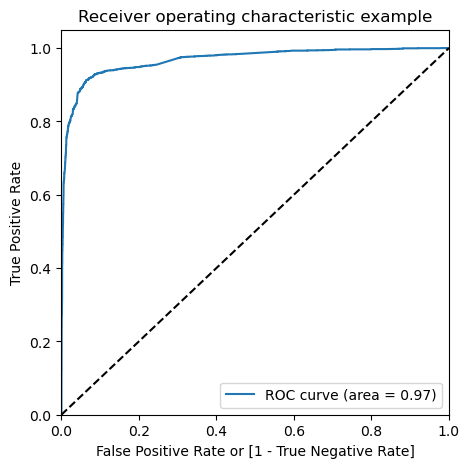

In [164]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding optimal cut-off point

In [165]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157981,295,0,1,1,0,0,0,0,0,0,0,0
1,0,0.057210,1657,0,1,0,0,0,0,0,0,0,0,0
2,1,0.999216,4592,1,1,1,1,1,1,1,1,1,1,1
3,0,0.106172,3558,0,1,1,0,0,0,0,0,0,0,0
4,0,0.164220,629,0,1,1,0,0,0,0,0,0,0,0


In [166]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383929  1.000000  0.000000
0.1   0.1  0.801813  0.973573  0.694774
0.2   0.2  0.911932  0.932699  0.898990
0.3   0.3  0.924242  0.915433  0.929732
0.4   0.4  0.926542  0.901691  0.942029
0.5   0.5  0.925731  0.881607  0.953228
0.6   0.6  0.917884  0.840028  0.966403
0.7   0.7  0.912744  0.813953  0.974308
0.8   0.8  0.904897  0.779422  0.983092
0.9   0.9  0.879735  0.704017  0.989240


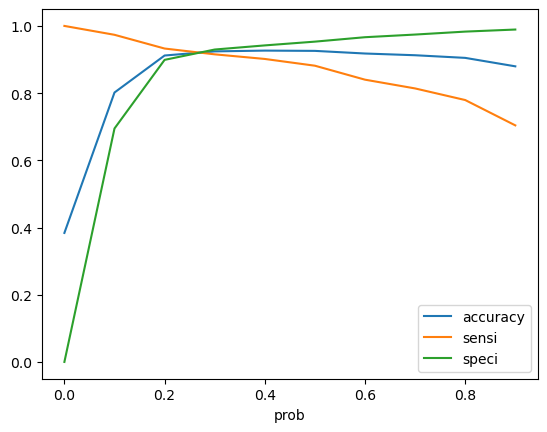

In [167]:
#plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [168]:
## From the curves above, 0.3 seems to be the optimum point to take it as a cutoff probability. Applying the same cut-off on train data

In [169]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157981,295,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.057210,1657,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.999216,4592,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.106172,3558,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.164220,629,0,1,1,0,0,0,0,0,0,0,0,0


In [170]:
#check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9242424242424242

In [171]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[4234,  320],
       [ 240, 2598]], dtype=int64)

In [172]:
TP1 = confusion2[1,1] 
TN1 = confusion2[0,0]
FP1 = confusion2[0,1]
FN1 = confusion2[1,0]

In [173]:
#sensitivity / recall of my model on train dataset 
r2 = TP1 / (TP1+FN1)
r2

0.9154334038054969

In [174]:
#specificity of my model on train dataset
TN1 / (TN1+FP1)

0.9297321036451471

In [175]:
#Precision of my model on train dataset
p2 = TP1 / (TP1+FP1)
p2

0.890335846470185

In [176]:
#F1 of my model on train dataset
F2 = 2 * r2 * p2 / (r2 + p2)
F2

0.9027102154273802

#### With the current cut off as 0.3, we got Precision around 88% , Specificity around 92% and Recall around 91% on Training Data

###  Making predictions on the test data set

In [177]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [178]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Tagged,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2212,0.918583,0,0,0,0,0,0,0,1,0,1,0
3034,1.078712,1,0,0,1,0,0,0,0,0,1,0
4492,-0.056262,0,0,0,0,1,0,0,0,0,0,0
5063,-0.005410,0,0,0,0,0,0,0,1,0,0,1
7645,-0.270490,0,0,0,0,1,0,0,0,0,1,0


In [179]:
X_test_sm = sm.add_constant(X_test)

In [180]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred[:10]

2212    0.004495
3034    0.998902
4492    0.138751
5063    0.032382
7645    0.041704
4658    0.048528
7481    0.106172
2608    0.001890
3706    0.005175
5626    0.033311
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2212,0.004495
3034,0.998902
4492,0.138751
5063,0.032382
7645,0.041704


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,2212,0.004495
1,1,3034,0.998902
2,0,4492,0.138751
3,0,5063,0.032382
4,0,7645,0.041704


In [187]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [188]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'],axis=1)
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,2212,0,0.004495
1,3034,1,0.998902
2,4492,0,0.138751
3,5063,0,0.032382
4,7645,0,0.041704


In [189]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head(20)

,Lead Number,Converted,Conversion_Prob,final_predicted
0,2212,0,0.004495,0
1,3034,1,0.998902,1
2,4492,0,0.138751,0
3,5063,0,0.032382,0
4,7645,0,0.041704,0
5,4658,0,0.048528,0
6,7481,0,0.106172,0
7,2608,0,0.001890,0
8,3706,0,0.005175,0
9,5626,0,0.033311,0


In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9291125541125541

In [191]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1047,   78],
       [  53,  670]], dtype=int64)

In [192]:
TP2 = confusion3[1,1]
TN2 = confusion3[0,0]
FP2 = confusion3[0,1]
FN2 = confusion3[1,0]

In [193]:
#recall / sensitivity of my model on test data 
r3 = TP2 / (TP2+FN2)
r3

0.9266943291839558

In [194]:
#specificity of my model on test data 
TN2 / (TN2+FP2)

0.9306666666666666

In [195]:
#precision of my model on test data
p3 = TP2 / (TP2 + FP2)
p3

0.8957219251336899

In [196]:
#F1 score of my model on test data
F3 = 2 * r3 * p3 / (p3 + r3)
F3

0.910944935418083

#### With the current cut-off as 0.3 we get Precision around 89% , Specificity around 93% and Recall around 92% on Testing Data